In [1]:
print('Hello World')

Hello World


In [2]:
#Imports
import cv2
import matplotlib.pyplot as plt
import random

In [4]:
#Functions

In [14]:
#read background image to have more realistic canvas
image_name='canvas2.jpg'
image = cv2.imread(image_name)
#resize the background image to prefered tiktok sixe
im_height=1920
im_width=1080
image = cv2.resize(image, (im_width,im_height), interpolation= cv2.INTER_LINEAR)
#lets plot the background image
plt.imshow(image)
print(image.shape)


(1920, 1080, 3)


True

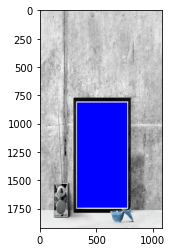

In [15]:
#As seen in the image, there is a canvas in the middle , we need to estimate the position of the rectangle
#this can be achieved by trial and error , finally we know the position of the canavas
im2=image.copy()
x1=325
x2=765
y1=815
y2=1740
im2 = cv2.rectangle(im2, (x1,y1), (x2,y2), (0,0,255), -1)
plt.imshow(im2)
cv2.imwrite('im2.png',im2)

In [16]:
#functions
#controls if a rectangle overlaps another rectangle
def overlap(R1, R2):
    if (R1['start_x']>=R2['end_x']) or (R1['end_x']<=R2['start_x']) or (R1['end_y']<=R2['start_y']) or (R1['start_y']>=R2['end_y']):
        return False
    else:
        return True
#given a canvas(rectangle) creates n number of rectangles inside it
def createRectangles(r_x1,r_y1,r_x2,r_y2,n):
    rect_list=[]
    for i in range(0,n):
        start_x=random.randint(r_x1, r_x2)
        start_y=random.randint(r_y1, r_y2)
        end_x=random.randint(start_x, r_x2)
        end_y=random.randint(start_y, r_y2)
        rect = {"start_x": start_x,"start_y": start_y,"end_x": end_x,"end_y": end_y,}
            #check if a rectangle collides with other rectangles in a list
        doOverlap=False
        for r in rect_list:
            if (overlap(r,rect)):
                doOverlap=True
        if not doOverlap:
            rect_list.append(rect)
    return rect_list

In [10]:
#create a function that fills the canvas(Rectangle) with many random rectangles.Rectangles that collide with other 
#rectangle should not be drawn to the canvas

im=image.copy()
rects=createRectangles(x1,y1,x2,y2,10000)
for r in rects:
    color=(random.randint(0, 255),random.randint(0, 255),random.randint(0, 255))
    im = cv2.rectangle(im, (r['start_x'],r['start_y']), (r['end_x'],r['end_y']),color ,1)
    #lets create random rectangles inside bigger ones
    w=r['end_x']-r['start_x']
    h=r['end_y']-r['start_y']
    area=w*h
    if(area>1000):
        new_list=createRectangles(r['start_x'],r['start_y'],r['end_x'],r['end_y'],2000)
        for r2 in new_list:
            im = cv2.rectangle(im, (r2['start_x'],r2['start_y']), (r2['end_x'],r2['end_y']),color ,1)
    

#im = cv2.rectangle(im, (start_x,start_y), (end_x,end_y), (0,random.randint(0, 255),random.randint(0, 255)),1)
cv2.imwrite('im2.png',im)
print(len(rects))

249


In [21]:
#create video
im=image.copy()
rects=createRectangles(x1,y1,x2,y2,10000)
fps=100
video=cv2.VideoWriter("video.mp4",fourcc,fps,(im_width,im_height))
for r in rects:
    color=(random.randint(0, 255),random.randint(0, 255),random.randint(0, 255))
    im = cv2.rectangle(im, (r['start_x'],r['start_y']), (r['end_x'],r['end_y']),color ,1)
    #lets create random rectangles inside bigger ones
    w=r['end_x']-r['start_x']
    h=r['end_y']-r['start_y']
    area=w*h
    if(area>1000):
        new_list=createRectangles(r['start_x'],r['start_y'],r['end_x'],r['end_y'],2000)
        for r2 in new_list:
            im = cv2.rectangle(im, (r2['start_x'],r2['start_y']), (r2['end_x'],r2['end_y']),color ,1)
            video.write(im)
    #video.write(im)

cv2.destroyAllWindows()
video.release()